<h1> Titanic: Machine Learning from Disaster </h1>

In [3849]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br/>
<h3>Read the training data </h3>

In [3850]:
train = pd.read_csv("input/train.csv")

In [3851]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3852]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3853]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3854]:
train.shape

(891, 12)

The training data is read from inpt/train.csv file. It has 891 rows and 12 columns and some of these values are null.

<br/>
<h3>Data Analysis</h3>

In [3855]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The columns Age, Cabin and Embarked has few null values. 

<br/>
<h4>Passenger survival based on Sex</h4>

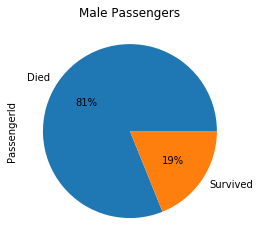

In [3856]:
males = train[train['Sex'] == 'male'][['Survived','PassengerId']]
males['Survived'] = males['Survived'].apply(lambda x : 'Died' if (x == 0) else 'Survived')
males.groupby(['Survived']).count()['PassengerId'].plot(kind='pie', y='PassengerId', autopct='%1.0f%%', title='Male Passengers')

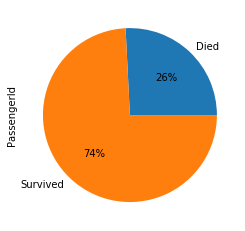

In [3857]:
females = train[train['Sex'] == 'female'][['Survived','PassengerId']]
females['Survived'] = females['Survived'].apply(lambda x : 'Died' if (x == 0) else 'Survived')
females.groupby(['Survived']).count()['PassengerId'].plot(kind='pie', autopct='%1.0f%%')

/usr/local/anaconda3/envs/cs224u/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


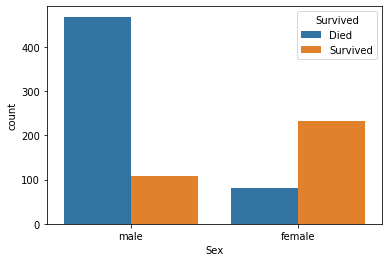

In [3858]:
df1 = train[['Sex', 'Survived']]
df1['Survived'] = df1['Survived'].apply(lambda x : 'Died' if (x == 0) else 'Survived')
sns.countplot(x='Sex', hue='Survived', data=df1)    

These plots shows more number of female passengers has survived compared to male passengers. so, Sex would be one of the feature while building the model

<br/>
<h4>Passenger survival based on Class</h4>

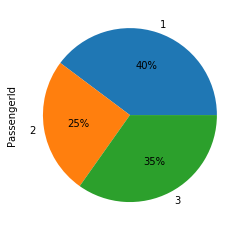

In [3859]:
survived = train[train['Survived'] == 1][['Pclass','PassengerId']]
survived.groupby(['Pclass']).count()['PassengerId'].plot(kind='pie', y='PassengerId', autopct='%1.0f%%')

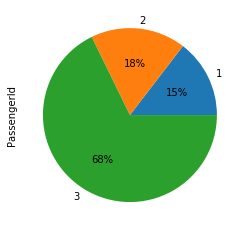

In [3860]:
died = train[train['Survived'] == 0][['Pclass','PassengerId']]
died.groupby(['Pclass']).count()['PassengerId'].plot(kind='pie', y='PassengerId', autopct='%1.0f%%')

/usr/local/anaconda3/envs/cs224u/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


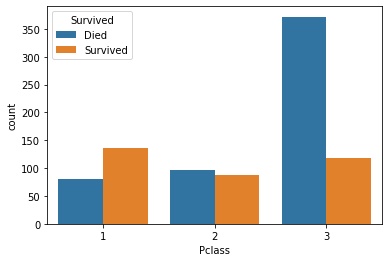

In [3861]:
df7 = train[['Age', 'Pclass', 'Sex', 'Survived']]
df7['Survived'] = df7['Survived'].apply(lambda x : 'Died' if (x == 0) else 'Survived')
sns.countplot(x='Pclass', hue='Survived', data=df7)                                     

/usr/local/anaconda3/envs/cs224u/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/envs/cs224u/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


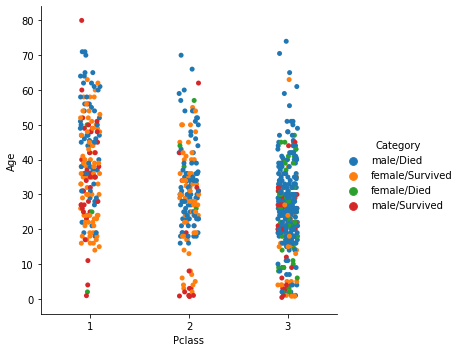

In [3862]:
df6 = train[['Age', 'Pclass', 'Sex', 'Survived']]
df6['Survived'] = df6['Survived'].apply(lambda x : '/Died' if (x == 0) else '/Survived')
df6['Category'] = df6['Sex']+df6['Survived']
sns.catplot(y='Age', x='Pclass', hue='Category', data=df6)

Large number of passengers from class 3 has not survived. Pclass would be a feature in the model

<br/>
<h4>Passenger survival based on Age group</h4>

/usr/local/anaconda3/envs/cs224u/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


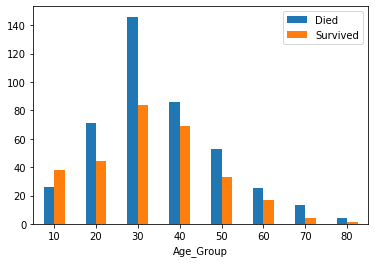

In [3863]:
train['Age_Group'] = pd.cut(x=train['Age'], bins=8, labels=False, retbins=False, include_lowest=True)
age_group = train[['Age_Group', 'Survived']]
age_group.rename(columns={'Survived':'S'}, inplace=True)
age_group= age_group[pd.notnull(age_group['Age_Group'])]
age_group['Age_Group'] = (age_group['Age_Group'].apply(np.int64) +1 )*  10
age_group['S'] = age_group['S'].apply(lambda x : 'Died' if (x == 0) else 'Survived')
survived= pd.get_dummies(age_group['S'], drop_first=False)
age_group = pd.concat([age_group, survived], axis=1)
del age_group['S']
dd = age_group.groupby(['Age_Group']).sum()
ax = dd.plot.bar(rot=0)

The above chart do not show any relation between age and survival of passenger. though more childs below age 10 has survived 

<br/>
<h4>Passenger survival based on Cabin</h4>

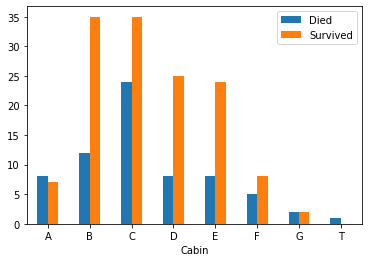

In [3864]:
df = train[pd.notnull(train['Cabin'])]
df = df[['Cabin', 'Survived']]
df.rename(columns={'Survived':'S'}, inplace=True)
df['Cabin'] = df['Cabin'].str.strip()
df['Cabin'] = df['Cabin'].str.extract(r"([A-Z]).*")[0]
df['S'] = df['S'].apply(lambda x : 'Died' if (x == 0) else 'Survived')
ss = pd.get_dummies(df['S'], drop_first=False)
df = pd.concat([df, ss], axis=1)
del df['S']
df = df.groupby(['Cabin']).sum()
ax = df.plot.bar(rot=0)

Passenger travelling in Cabin has very good change of survival. The about chart do not show any relation between specific Cabin and survival chance of passenger

<br/>
<h3> Missing values </h3>

The training data-set has 891 rows however columns Age, Cabin and Embarked has few null values. Investigate whether these values can be populated with appropriate values

<h4>column 'Age' </h4>
Age column has few null values. These cane be populated using mean age of the title of that passenger. The Name column has various titles like Mr, Mrs, Master, Miss and so on. Average age for each title can be calculated and it can be used to populate missing age column value.

In [3865]:
train[pd.isnull(train['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,NaN


In [3866]:
def impute_age(df):
    titleRegExp = r"(Mr|Mrs|Master|Miss|Rev|Sir|Dr|Ms|Lady|Col|Capt|Major|Mme|the Countess)[.|\s]"
    df = pd.concat([df, df['Name'].str.extract(titleRegExp)[[0]]], axis=1)
    df.rename(columns={0:'Title'}, inplace=True)
    df['Title'] = df.apply (lambda r: ('Miss' if (r['Title'] == 'Ms' ) else r['Title']), axis=1)
    df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'), inplace=True)
    del df['Title']
    return df

<h4>column 'Embarked' </h4>
Null values in 'Embarked' column are filled with 'UNK'

In [3867]:
def impute_embarked(df):
    df['Embarked'].fillna('UNK',inplace=True)
    return df

<h4>column 'Cabin' </h4>
Null values in 'Cabin' column are filled with 'UNK'

In [3868]:
def impute_cabin(df):
    df['Cabin'].fillna('UNK',inplace=True)
    return df

In [3869]:
#sets the index to PassengerId. This field is not required for model
def set_index(df) :
    df.set_index(['PassengerId'], inplace=True)
    return df

In [3870]:
def pre_processing(df):
    df = (df.pipe(impute_age)
            .pipe(impute_cabin)
            .pipe(impute_embarked)
            .pipe(set_index))
    return df

In [3871]:
train = pre_processing(train)

<h4> Verify that all null values for column 'age' are now populated </h4>

In [3872]:
train[pd.isnull(train['Age'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
PassengerId,,,,,,,,,,,,


In [3873]:
train[pd.isnull(train['Embarked'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
PassengerId,,,,,,,,,,,,


In [3874]:
train[pd.isnull(train['Cabin'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
PassengerId,,,,,,,,,,,,


In [3875]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNK,S,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNK,S,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNK,S,3.0


In [3876]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
PassengerId,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,UNK,S,2.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.816327,1,2,W./C. 6607,23.45,UNK,S,NaN
890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C,2.0
891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,UNK,Q,3.0


<br/>
<h3>Feature Creation</h3>

<h4>Feature 'Cabin'</h4>
'has_cabin' feature will indicate whether passeger has cabin. If 'Cabin is null then this value will be 0 otherwise 1

'Cabin' feature is generated based on each class of cabin. Class of Cabin is defined by first character of the Cabin ID. Cabin feature is populated based on the first character of the Cabin ID. In case of None Cabin ID, set all features to 0 

In [3877]:
def build_cabin_feature(df) :
    df['has_cabin'] = df.apply (lambda row: (0 if (row['Cabin'] == 'UNK') else 1), axis=1)
    df['Cabin'] = df['Cabin'].str.strip()
    df['Cabin'] = df['Cabin'].str.extract(r"([A-Z]).*")[0]
    cabin = pd.get_dummies(df['Cabin'], prefix='Cabin', drop_first=False)
    # drop column UNK which is related to NaN?
    del cabin['Cabin_U']
    df = pd.concat([df,cabin],axis=1)
    del df['Cabin']
    return df

<h4>Feature 'Sex'</h4>
Convert Sex into Male and Female feature. one of these feature can be dropped since value of one is sufficient to determine the Sex.

In [3878]:
def populate_sex(df):
    sex = pd.get_dummies(df['Sex'], drop_first=True)
    df = pd.concat([df,sex],axis=1)
    del df['Sex']
    return df

<h4>Feature 'Age'</h4>
Convert Age into aget group of 10 years each.
Also, add feature to indicate whether traveller is Young, Adult, Old or Senior

In [3879]:
train['Age'].min(), train['Age'].max()

(0.42, 80.0)

In [3880]:
def populate_age(df):
    df['Age_Group'] = pd.cut(x=df['Age'], bins=8, labels=False, retbins=False, include_lowest=True)
    df['Age_G'] = df.apply (lambda r: ('Young' if (r['Age'] <= 20 ) else ('Adult' if (r['Age'] <= 40) else ( 'Old' if (r['Age'] <= 60) else 'Senior'))), axis=1)
    age = pd.get_dummies(df['Age_G'], drop_first=False)
    df = pd.concat([df,age],axis=1)
    del df['Age_G']
    del df['Age']
    return df

<h4>Feature 'With_Family'</h4>
This feature is calculated using SibSp and Parch features
If value of sum of these two feature is 0 then traveling alone otherwise travelling with family

In [3881]:
def populate_with_family(df):
    df['With_Family'] = df.apply (lambda row: (0 if (row['SibSp']+row['Parch'] == 0 ) else 1), axis=1)
    #del df['SibSp']
    #del df['Parch']
    return df

<h4>Feature 'Embarked'</h4>

In [3882]:
def populate_embarked(df):
    embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=False)
    if ('Embarked_UNK' in embarked.columns) :
        del embarked['Embarked_UNK']
    df = pd.concat([df,embarked],axis=1)
    del df['Embarked']
    return df

<h4>Delete Unnecessary features</h4>
Delete features like Name, Ticket and Fare which does not seems to contribute to survival.
If Fare is anyway related to survival then it is indirectly considered by Cabin feature.

In [3883]:
def delete_features(df, to_delete):
    df = df.drop(to_delete, axis=1)
    return df

In [3884]:
def populate_features(df):
    df = (df.pipe(build_cabin_feature)
          .pipe(populate_sex)
          .pipe(populate_age)
          .pipe(populate_with_family)
          .pipe(populate_embarked)
          .pipe(delete_features, to_delete=['Name', 'Ticket', 'Fare']))  
    return df

In [3885]:
train = populate_features(train)

In [3886]:
train

,Survived,Pclass,SibSp,Parch,Age_Group,has_cabin,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Cabin_T,male,Adult,Old,Senior,Young,With_Family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,2,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
2,1,1,1,0,3,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,1,3,0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,1,1,0,3,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
5,0,3,0,0,3,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,0,2,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
888,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
889,0,3,1,2,2,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


<h3>Feature selection</h3

Find the correleation between features and remove correleated features from the model

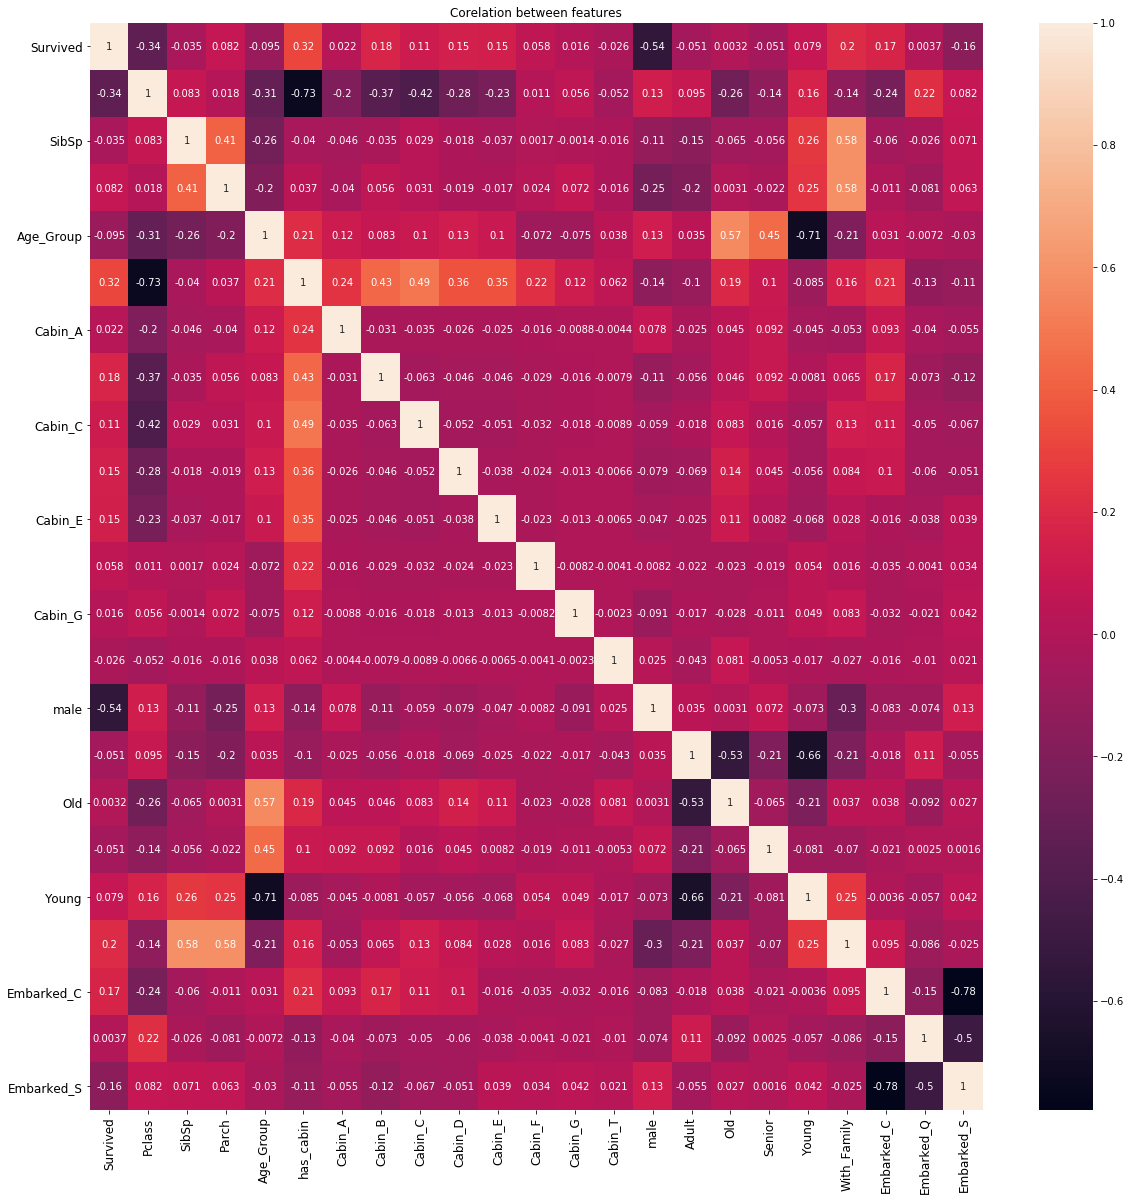

In [3887]:
sns.heatmap(train.corr(), annot=True).set_title("Corelation between features")
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

deleting features has_cabin, With_Family, Parch, Adult, Old, Young and Senior since these features has high correleation with other features.

In [3888]:
train = delete_features(train, ['Cabin_T', 'has_cabin', 'Adult', 'Old', 'Senior', 'Young', 'Parch', 'With_Family'])

In [3889]:
train

,Survived,Pclass,SibSp,Age_Group,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,1,2,0,0,0,0,0,0,0,1,0,0,1
2,1,1,1,3,0,0,1,0,0,0,0,0,1,0,0
3,1,3,0,2,0,0,0,0,0,0,0,0,0,0,1
4,1,1,1,3,0,0,1,0,0,0,0,0,0,0,1
5,0,3,0,3,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,2,0,0,0,0,0,0,0,1,0,0,1
888,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1
889,0,3,1,2,0,0,0,0,0,0,0,0,0,0,1


In [3890]:
train.shape

(891, 15)

<br/>
<h3>Build Model</h3>

In [3891]:
y = train['Survived']
X = train
del X['Survived']

In [3892]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [3893]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
def build_model(X, y):
    lr = LogisticRegression()
    rfe = RFE(lr, 10)             
    rfe = rfe.fit(X, y)
    
    X = X[X.columns[rfe.support_]]

    lr = LogisticRegression()
    rfe = RFE(lr, 10)             
    rfe = rfe.fit(X, y)

    return rfe, X

In [3894]:
rfe, X_train = build_model(X_train, y_train)

<br/>
<h3>Prediction and Confusion Matrix<h3>

In [3895]:
X_test = X_test[X_train.columns]
y_pred = rfe.predict(X_test)
score = round(rfe.score(X_test,y_test) * 100,2)
print('Accuracy : {s:.2f}%'.format(s = score))

Accuracy : 80.97%


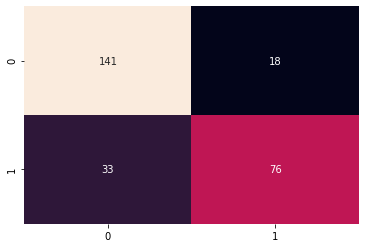

In [3896]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f', cbar=False)


<br/>
<h3>Hyperparameter Tuning</h3>

In [3897]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01,0.1,10,100,1000]}
lr = LogisticRegression()
gm = GridSearchCV(lr, param_grid, cv=5)
gm_result = gm.fit(X_train, y_train)
best_score, best_params = gm_result.best_score_, gm_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.800981 using {'C': 100}


In [3898]:
y_pred = gm.predict(X_test)
score = round(gm.score(X_test,y_test) * 100,2)
print('Accuracy : {s:.2f}%'.format(s = score))

Accuracy : 81.34%


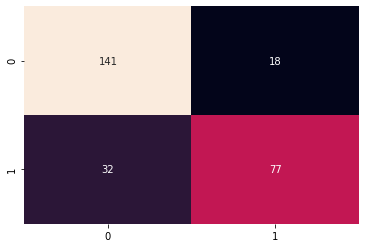

In [3899]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f', cbar=False)

<br/>
<h3>Submission</h3>

In [3909]:
X_sub  = pd.read_csv("input/test.csv")
X_passid = X_sub['PassengerId']
X_sub  = pre_processing(X_sub)
X_sub  = populate_features(X_sub)
X_sub  = X_sub[X_train.columns]
y_pred = gm.predict(X_sub)

y_pred = pd.DataFrame(y_pred.reshape(len(y_pred),1), columns=['Survived'])
res = pd.concat([X_passid, y_pred], axis=1)
res.to_csv('gender_submission.csv', index=False)
